In [22]:

import requests
from bs4 import BeautifulSoup

import pickle

from nltk_helpers import get_sentiments

from imdb import IMDb
from imdb.helpers import sortedSeasons


ia=IMDb()


#tt  whole  0944947
#tt  title  5924366
#tt         6027908
#tt         6027912
#tt         6027914
#tt         6027916
#tt         6027920
series = ia.get_movie('0944947')


ia.update(series, 'episodes')
sumofRating=0
no_of_epsdes=0
rating_avg=[]

for season_nr in sorted(series['episodes']):
    for episode_nr in sorted(series['episodes'][season_nr]):
       episode = series['episodes'][season_nr][episode_nr]
       sumofRating=sumofRating+episode.get('rating')
       print(episode.get('rating'))
       no_of_epsdes=no_of_epsdes+1
    rating_avg.append(sumofRating/no_of_epsdes)
    sumofRating=0  
    no_of_epsdes=0
        
print(rating_avg)

count=0

Season8=['5924366','6027908','6027912','6027914','6027916','6027920']


RawReview=[]
counter=0

for season in Season8:
    movie=ia.get_episode(season)
    reviews=ia.get_movie_reviews(season)
    for review in reviews['data']['reviews']:
         count+=1
         #RawReview.insert(++counter,review['content'])
         RawReview.append(review['content'])
         
         #print(review['content'])
          
        
         
#created a pickle file
         
with open('season8.pkl', 'wb') as f:
    pickle.dump(RawReview,f)


#Reading the pickle file

with open('season8.pkl','rb') as f:
    sentis =pickle.load(f)


#sentiment of first one

#print('---------------------',get_sentiments((sentis[0].text)))
#print('---------------------',get_sentiments(sentis[1]))





#print(reviews['data']['reviews'][0]['content'])

s=0

for senti in sentis:
    s+=1
    #print(get_sentiments(senti))

#print('test',s)

print(count)
    
    





9.101234567891
8.801234567891
8.701234567891
8.801234567891
9.101234567891
9.201234567891
9.301234567891
9.101234567891
9.601234567891
9.501234567891
8.901234567891
8.601234567891
8.901234567891
8.901234567891
8.901234567891
9.101234567891
9.001234567891
8.901234567891
9.701234567891
9.501234567891
8.901234567891
8.701234567891
8.901234567891
9.601234567891
9.101234567891
8.901234567891
8.801234567891
9.101234567891
9.901234567891
9.201234567891
9.201234567891
9.701234567891
8.901234567891
8.901234567891
8.801234567891
9.701234567891
9.201234567891
9.701234567891
9.601234567891
9.701234567891
8.601234567891
8.601234567891
8.601234567891
8.801234567891
8.701234567891
8.101234567891
9.101234567891
9.901234567891
9.501234567891
9.101234567891
8.601234567891
9.401234567891
8.801234567891
9.201234567891
9.701234567891
8.501234567891
8.701234567891
8.501234567891
9.901234567891
9.901234567891
8.701234567891
9.001234567891
9.201234567891
9.801234567891
8.901234567891
9.001234567891
9.50123456

AttributeError: 'str' object has no attribute 'text'

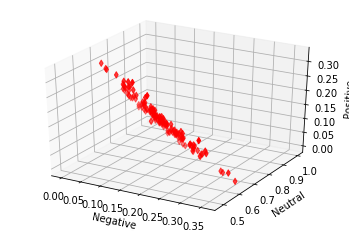

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#build our figure


fig = plt.figure()

# build axis

ax=fig.add_subplot(111, projection='3d')

'''
sentiments =[get_sentiments(tweet.text) for tweet in tweets]
#build our xs, ys, zs

xs=[]

for sent in sentiments:
    xs.append(sent['neg'])
    
ys = [sent['neu'] for sent in sentiments]
zs = list(map(lambda x: x['pos'], sentiments))
    
print(xs)
print(ys)
print(zs)

ax.scatter(xs,ys,zs)

'''
#add another set of data



from nltk_helpers import split_sentiments

dataX, dataY, dataZ = split_sentiments([get_sentiments(tweet) for tweet in sentis])

ax.scatter(dataX, dataY, dataZ, color='r',marker='d')





ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_zlabel('Positive')




plt.show()




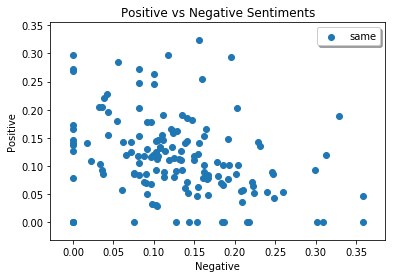

In [16]:


#plt.scatter(dataX,dataY,color='r',marker='*',label='idk')

plt.xlabel('Negative')
plt.ylabel('Positive')

plt.title('Positive vs Negative Sentiments')



plt.scatter(dataX,dataZ,label='same')

plt.legend(loc='upper right', shadow=True)


plt.show()

In [20]:
plt.hist(rating_avg.values())

plt.show()

NameError: name 'rating_avg' is not defined

[9.341234567890998, 9.158377425033859, 9.121234567891, 9.121234567890998, 9.111234567891, 9.041234567891001, 8.901234567890999, 6.501234567890999]


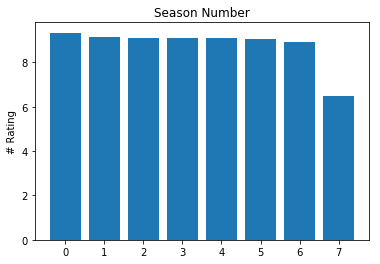

In [34]:
import matplotlib.pyplot as plt

NUM_VALUES = 8

heights=list(rating_avg)
heights.sort(reverse=True)
print(heights)
plt.bar(range((NUM_VALUES)), heights[:NUM_VALUES])
plt.title('Season Number')
plt.ylabel('# Rating')
#keys = list(word_counts.keys())
#keys.sort(reverse=True, key=lambda x: word_counts[x])
#print(keys)
#plt.xticks(range((NUM_VALUES)),keys[:NUM_VALUES])
plt.show()